### **Read Data**

In [ ]:
import pickle
with open("./data/task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    # look at the immune system
    data_multiomics["immune_system"]


In [ ]:
data_multiomics.head()

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [ ]:
immune_system_df = data_multiomics["immune_system"]
# immune_system_df['gestational_age'] = data_multiomics['gestational_age']
# immune_system_df = data_multiomics[['gestational_age', 'immune_system']].copy()

# immune_system_df.loc[:, 'gestational_age'] = data_multiomics['gestational_age']
immune_system_df.head()

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


### **EDA**

In [ ]:
immune_system_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Columns: 534 entries, 0_Bcells to 533_Tregs_STAT5_Unstim
dtypes: float64(534)
memory usage: 284.2 KB


In [ ]:
immune_system_df.describe()

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.088664,0.040560,0.219791,0.166037,0.395832,0.006035,0.010955,0.004799,0.073156,0.096926,...,0.998286,0.816198,0.839417,0.618643,0.529808,0.768246,0.419237,0.424145,0.381095,0.506808
std,0.032683,0.032928,0.042841,0.069334,0.076555,0.003800,0.003607,0.002945,0.032396,0.033170,...,0.104334,0.106087,0.151541,0.098709,0.108285,0.240088,0.051584,0.064382,0.053005,0.121552
min,0.028000,0.004128,0.127551,0.048464,0.195000,0.000472,0.002967,0.001549,0.026858,0.042526,...,0.802085,0.562920,0.466587,0.442990,0.324728,0.361527,0.313406,0.300372,0.265301,0.332834
25%,0.060670,0.013874,0.191423,0.108341,0.352024,0.003499,0.008687,0.002536,0.047581,0.069418,...,0.911435,0.735956,0.753809,0.551750,0.456984,0.543226,0.381348,0.374881,0.344660,0.437602
50%,0.088891,0.033687,0.219631,0.162796,0.411729,0.005416,0.011389,0.003802,0.068568,0.100948,...,0.999512,0.803717,0.852729,0.610673,0.505229,0.761101,0.423601,0.420748,0.378587,0.494499
75%,0.108091,0.058694,0.252165,0.205072,0.441749,0.007428,0.013568,0.006478,0.090845,0.119696,...,1.071410,0.901521,0.915458,0.660776,0.604768,0.933505,0.454074,0.468308,0.413528,0.549361
max,0.171407,0.127325,0.310133,0.352913,0.514109,0.019802,0.018088,0.014610,0.169851,0.191042,...,1.202504,1.081295,1.270881,1.128234,0.798976,1.291782,0.560379,0.592947,0.505706,1.172768


In [ ]:
immune_system_df['gestational_age'].unique()

array([11, 18, 32, 45, 27, 48, 15, 25, 42, 24, 43, 17, 28, 26, 44, 46,  8,
       16, 12, 10, 19, 31, 47])

In [ ]:
immune_system_df.corr()

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0_Bcells,1.000000,-0.019644,-0.116579,-0.195476,-0.270817,0.265069,0.282151,-0.300598,-0.097637,0.043459,...,0.233820,0.038950,-0.163775,-0.134652,-0.115011,-0.213403,-0.118495,-0.202927,-0.166727,-0.163465
1_CD16+CD56-NKcells,-0.019644,1.000000,-0.099955,-0.256585,-0.297486,0.063416,0.198388,0.018241,0.611480,0.099725,...,-0.099368,-0.140418,0.154367,0.116327,-0.091001,0.173160,-0.083785,-0.178964,-0.123718,-0.052155
2_CD4+Tcells_mem,-0.116579,-0.099955,1.000000,-0.210969,0.393222,-0.478505,0.255410,0.051025,-0.167255,0.157324,...,0.132619,0.146380,0.042213,0.019794,-0.097715,-0.374551,0.092723,-0.154319,0.113200,-0.011639
3_CD4+Tcells_naive,-0.195476,-0.256585,-0.210969,1.000000,0.814598,0.670463,0.021215,0.050073,-0.424839,-0.603630,...,-0.337600,-0.348014,-0.087201,-0.142461,0.135779,0.119337,0.045994,0.203644,0.006898,-0.053088
4_CD4+Tcells,-0.270817,-0.297486,0.393222,0.814598,1.000000,0.334717,0.150575,0.079073,-0.488362,-0.474795,...,-0.243100,-0.237331,-0.055177,-0.121027,0.088503,-0.083929,0.112185,0.118499,0.084166,-0.038630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529_Tbet+CD4+Tcells_naive_STAT5_Unstim,-0.213403,0.173160,-0.374551,0.119337,-0.083929,-0.016440,-0.471436,0.084338,0.203664,-0.210966,...,-0.380757,-0.211800,-0.123356,-0.142953,0.488919,1.000000,0.228686,0.531693,0.156876,0.254355
530_Tbet+CD8+Tcells_mem_STAT5_Unstim,-0.118495,-0.083785,0.092723,0.045994,0.112185,-0.021123,-0.150990,-0.172525,-0.144667,-0.056782,...,0.504344,0.613138,0.509652,0.439120,0.821217,0.228686,1.000000,0.831962,0.928340,0.596921
531_Tbet+CD8+Tcells_naive_STAT5_Unstim,-0.202927,-0.178964,-0.154319,0.203644,0.118499,0.018195,-0.471430,-0.006519,-0.133033,-0.276665,...,0.282243,0.456750,0.427024,0.294394,0.851295,0.531693,0.831962,1.000000,0.766969,0.538080
532_TCRgd+Tcells_STAT5_Unstim,-0.166727,-0.123718,0.113200,0.006898,0.084166,-0.041876,-0.148438,-0.234455,-0.263529,0.096042,...,0.573427,0.611343,0.531955,0.480721,0.730828,0.156876,0.928340,0.766969,1.000000,0.569597


In [ ]:
import numpy as np

# Assuming df is your DataFrame with the correlation matrix
threshold = 0.95  # Choose an appropriate correlation threshold
# Create correlation matrix
corr_matrix = immune_system_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features
df_12 = immune_system_df.drop(to_drop, axis=1)

In [ ]:
df_12

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,522_Gr_STAT5_Unstim,523_intMCs_STAT5_Unstim,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.765486,1.326944,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.454665,0.443859
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.754300,1.107668,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.474408,0.491691
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,0.809271,1.259877,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.481862,0.505706
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.731472,1.241290,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.445444,0.438285
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.476476,1.217666,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.423530,0.332368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.091121,0.126476,0.143706,0.048464,0.195000,0.004209,0.007141,0.002082,0.169851,0.148295,...,0.625141,1.217638,1.108355,0.797910,0.892495,0.753036,0.531549,0.831332,0.412894,0.378466
64,0.070466,0.070750,0.247024,0.194472,0.462523,0.003692,0.009168,0.002431,0.077975,0.082531,...,0.644654,0.989294,0.913312,0.717190,0.758279,0.604196,0.600195,1.291782,0.462645,0.371572
65,0.061253,0.041134,0.236547,0.237067,0.496289,0.005648,0.011004,0.001758,0.047221,0.093727,...,0.650777,1.046170,0.954390,0.684022,0.740287,0.613545,0.604309,1.125464,0.458300,0.406314
66,0.052479,0.030232,0.210169,0.245472,0.478379,0.007130,0.008604,0.003692,0.039343,0.084122,...,0.675143,1.037943,0.938450,0.762454,0.795962,0.607801,0.622691,1.121270,0.474322,0.411770


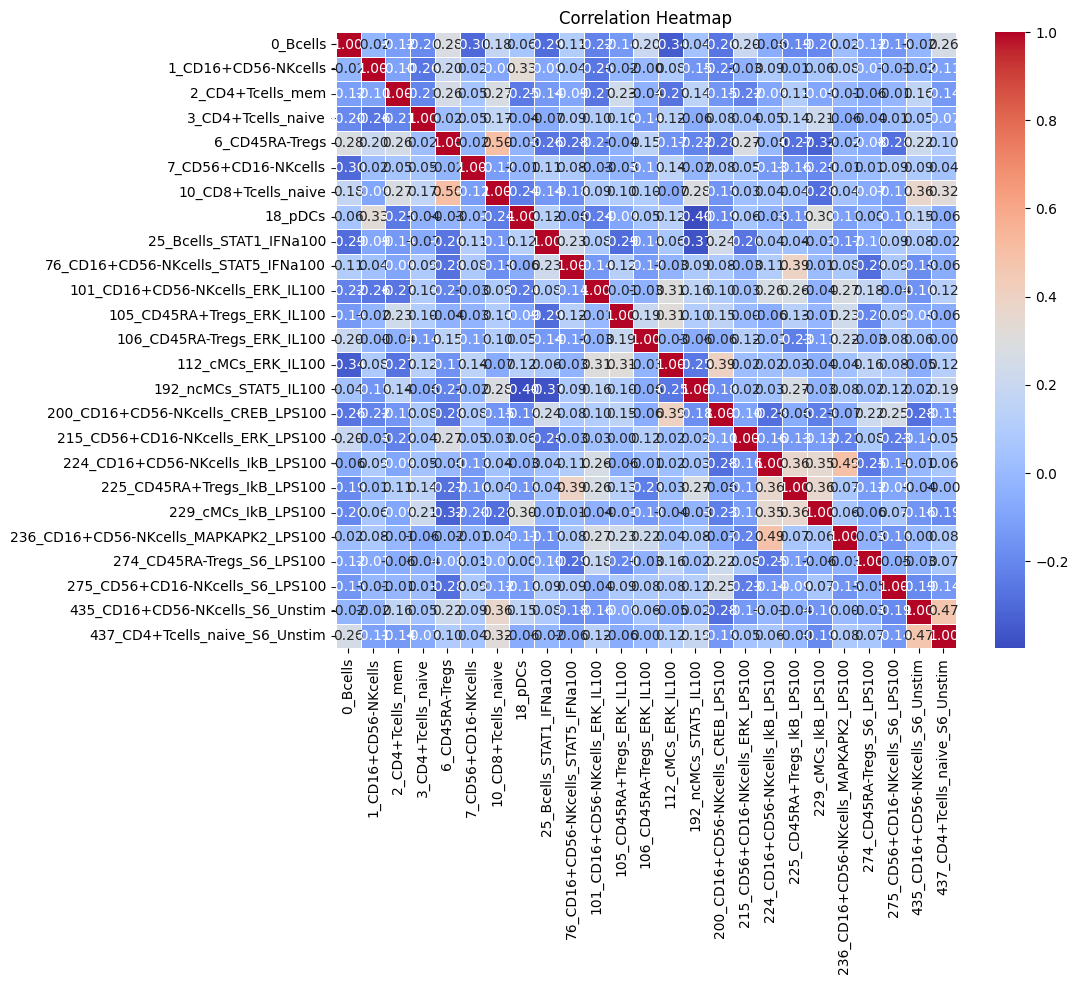

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = df_12.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()